###TAI911S ASSIGNMENT 1
##PROBLEM 2

##Group Members:
#Sakaria Nekwaya 214059286
#Hambeleleni Shaningwa 213091704

In [369]:
using CSV
using DataFrames
using MLJ  # Machine Learning package
using MLJModels  # Logistic Regression
using StatsPlots
using Plots
using DecisionTree
using Random

In [371]:
df = CSV.read("fetal_health.csv", DataFrame)

Row,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
6,134.0,0.001,0.0,0.01,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
7,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
8,122.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.0,0.0,0.002,0.0,0.0,0.0,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0


In [373]:
size(df)

(2126, 22)

In [375]:
n = nrow(df)

2126

In [377]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,baseline value,133.304,106.0,133.0,160.0,0,Float64
2,accelerations,0.00317827,0.0,0.002,0.019,0,Float64
3,fetal_movement,0.00948071,0.0,0.0,0.481,0,Float64
4,uterine_contractions,0.00436642,0.0,0.004,0.015,0,Float64
5,light_decelerations,0.00188946,0.0,0.0,0.015,0,Float64
6,severe_decelerations,3.29257e-6,0.0,0.0,0.001,0,Float64
7,prolongued_decelerations,0.000158514,0.0,0.0,0.005,0,Float64
8,abnormal_short_term_variability,46.9901,12.0,49.0,87.0,0,Float64
9,mean_value_of_short_term_variability,1.33278,0.2,1.2,7.0,0,Float64


In [379]:
df = dropmissing(df)

Row,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
6,134.0,0.001,0.0,0.01,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
7,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
8,122.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.0,0.0,0.002,0.0,0.0,0.0,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0


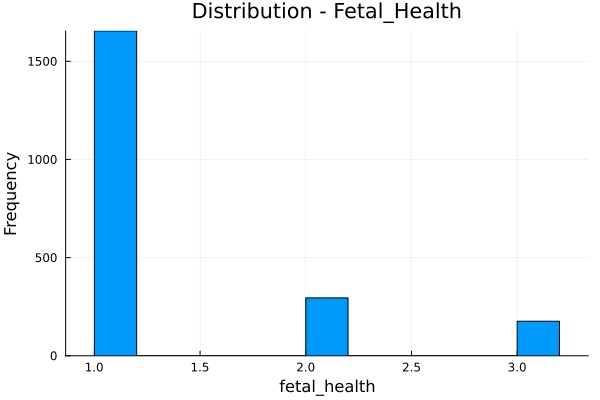

In [381]:
#Classification
histogram(df.fetal_health, title="Distribution - Fetal_Health", xlabel="fetal_health", ylabel="Frequency", legend=false)

In [383]:
df.fetal_health = categorical(df.fetal_health)
coerce!(df, :fetal_health => Multiclass)

Row,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
6,134.0,0.001,0.0,0.01,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
7,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
8,122.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.0,0.0,0.002,0.0,0.0,0.0,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0


##USING RANDOM FOREST CLASSIFIER

In [386]:
#Stratified train-test split
classes = unique(df.fetal_health)
train_indices = Int[]
test_indices = Int[]

for c in classes
    class_rows = findall(df.fetal_health .== c)
    n = length(class_rows)
    n_train = floor(Int, 0.8 * n)
    shuffle!(class_rows)
    append!(train_indices, class_rows[n_train+1:end])
end
train_data = df[train_indices, :]
test_data = df[test_indices, :]

Row,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…


In [388]:
#Separate the target and features
y_name = :fetal_health
X_train = select(train_data, Not(y_name))
y_train = train_data[:, y_name]
X_test = select(test_data, Not(y_name))
y_test = test_data[:, y_name]

0-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}

In [390]:
#Standardize features
std_model = Standardizer()
std_machine = machine(std_model, X_train)
MLJ.fit!(std_machine)
X_train_std = MLJ.transform(std_machine, X_train)
X_test_std = MLJ.transform(std_machine, X_test)

[ Info: Training machine(Standardizer(features = Symbol[], …), …).


Row,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64


##USING MULTINOMIAL CLASSIFIER

In [253]:
# Split data into features and target
X = select(df, Not(:fetal_health))
y = df.fetal_health

2126-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}:
 2.0
 1.0
 1.0
 1.0
 1.0
 3.0
 3.0
 3.0
 3.0
 3.0
 2.0
 2.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0

In [255]:
# Split into training and test sets
train, test = partition(eachindex(y), 0.8, shuffle=true)

([1808, 218, 407, 1000, 1378, 131, 2099, 575, 846, 593  …  206, 1239, 1391, 385, 1471, 1832, 1131, 1766, 1041, 1104], [541, 1414, 1476, 1695, 1746, 1388, 585, 1186, 2069, 1088  …  574, 607, 1967, 1459, 1690, 378, 2073, 177, 86, 499])

In [257]:
# Define classifier (Logistic Regression for multiclass classification)
mn_model = MultinomialClassifier()

MultinomialClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :l2, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [265]:
# Train model
mach = machine(mn_model, X, y)
MLJ.fit!(mach, rows=train)

[ Info: Training machine(MultinomialClassifier(lambda = 2.220446049250313e-16, …), …).
┌ Warning: f_tol is deprecated. Use f_abstol or f_reltol instead. The provided value (0.0001) will be used as f_reltol.
└ @ Optim C:\Users\hambe\.julia\packages\Optim\8dE7C\src\types.jl:120
┌ Info: Solver: LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()


trained Machine; caches model-specific representations of data
  model: MultinomialClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @096 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @404 ⏎ AbstractVector{Multiclass{3}}


In [267]:
# Predict on test data
y_pred = predict_mode(mach, X[test, :])


425-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [355]:
# Evaluate model accuracy
accuracy = mean(y_pred .== y[test])
println("Model Accuracy: ", round(accuracy; digits=3))

Model Accuracy: 0.847
